In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Import citipy module.
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

647

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | nouadhibou
Processing Record 4 of Set 1 | talnakh
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | alofi
Processing Record 10 of Set 1 | salalah
Processing Record 11 of Set 1 | chimoio
Processing Record 12 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | vanimo
Processing Record 15 of Set 1 | ekibastuz
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | sitka
Processing Record 18 of Set 1 | chokurdakh
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | rutland
Processing Record 22 of Set 1 | jalu
Processing Record 23 of Set 1 | tako

Processing Record 38 of Set 4 | ambilobe
Processing Record 39 of Set 4 | bure
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | grand baie
Processing Record 42 of Set 4 | yatou
Processing Record 43 of Set 4 | pavilosta
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | esperance
Processing Record 46 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 47 of Set 4 | nikolskoye
Processing Record 48 of Set 4 | vila franca do campo
Processing Record 49 of Set 4 | margate
Processing Record 50 of Set 4 | itarantim
Processing Record 1 of Set 5 | pitrufquen
Processing Record 2 of Set 5 | soma
Processing Record 3 of Set 5 | elizabeth city
Processing Record 4 of Set 5 | bahar
Processing Record 5 of Set 5 | rudnogorsk
Processing Record 6 of Set 5 | xuddur
Processing Record 7 of Set 5 | saint-doulchard
Processing Record 8 of Set 5 | lazaro cardenas
Processing Record 9 of Set 5 | beloha
Processing Record 10 of Set 5 | katsuura
Proces

Processing Record 29 of Set 8 | gloversville
Processing Record 30 of Set 8 | mrirt
City not found. Skipping...
Processing Record 31 of Set 8 | brumado
Processing Record 32 of Set 8 | bathsheba
Processing Record 33 of Set 8 | luanda
Processing Record 34 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | yar-sale
Processing Record 37 of Set 8 | lashio
Processing Record 38 of Set 8 | buriti bravo
Processing Record 39 of Set 8 | warqla
City not found. Skipping...
Processing Record 40 of Set 8 | mareeba
Processing Record 41 of Set 8 | lyubech
Processing Record 42 of Set 8 | madimba
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | goure
Processing Record 45 of Set 8 | krasnoselkup
Processing Record 46 of Set 8 | phan rang
City not found. Skipping...
Processing Record 47 of Set 8 | dunmore east
Processing Record 48 of Set 8 | ambanja
Processing Record 49 of Set 8 | hasaki
Processing Record 50 

Processing Record 13 of Set 12 | khani
Processing Record 14 of Set 12 | tukrah
Processing Record 15 of Set 12 | peruibe
Processing Record 16 of Set 12 | wanning
Processing Record 17 of Set 12 | klaksvik
Processing Record 18 of Set 12 | makakilo city
Processing Record 19 of Set 12 | tank
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | panaba
Processing Record 22 of Set 12 | ixtapa
Processing Record 23 of Set 12 | sabha
Processing Record 24 of Set 12 | axim
Processing Record 25 of Set 12 | syracuse
Processing Record 26 of Set 12 | sakaraha
Processing Record 27 of Set 12 | bitung
Processing Record 28 of Set 12 | olinda
Processing Record 29 of Set 12 | vila velha
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | kawana waters
City not found. Skipping...
Processing Record 32 of Set 12 | abu zabad
Processing Record 33 of Set 12 | rawson
Processing Record 34 of Set 12 | one hundred mile house
City not found. Skipping...
Processing Record 

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,46.81,28,13,1.99,US,2022-04-29 00:15:43
1,Khatanga,71.9667,102.5000,14.94,94,95,5.82,RU,2022-04-29 00:15:44
2,Nouadhibou,20.9310,-17.0347,64.38,82,2,14.97,MR,2022-04-29 00:15:44
3,Talnakh,69.4865,88.3972,16.21,86,100,2.10,RU,2022-04-29 00:15:45
4,Mataura,-46.1927,168.8643,57.47,69,12,1.41,NZ,2022-04-29 00:15:45
5,Avarua,-21.2078,-159.7750,82.45,78,40,10.36,CK,2022-04-29 00:15:46
6,Airai,-8.9266,125.4092,66.58,64,87,2.62,TL,2022-04-29 00:15:46
7,Busselton,-33.6500,115.3333,56.48,74,28,4.94,AU,2022-04-29 00:15:46
8,Alofi,-19.0595,-169.9187,80.49,83,75,19.57,NU,2022-04-29 00:15:47
9,Salalah,17.0151,54.0924,84.29,79,20,3.44,OM,2022-04-29 00:15:47


In [20]:
# Reorder the columns
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-29 00:15:43,42.6001,-73.9662,46.81,28,13,1.99
1,Khatanga,RU,2022-04-29 00:15:44,71.9667,102.5000,14.94,94,95,5.82
2,Nouadhibou,MR,2022-04-29 00:15:44,20.9310,-17.0347,64.38,82,2,14.97
3,Talnakh,RU,2022-04-29 00:15:45,69.4865,88.3972,16.21,86,100,2.10
4,Mataura,NZ,2022-04-29 00:15:45,-46.1927,168.8643,57.47,69,12,1.41
5,Avarua,CK,2022-04-29 00:15:46,-21.2078,-159.7750,82.45,78,40,10.36
6,Airai,TL,2022-04-29 00:15:46,-8.9266,125.4092,66.58,64,87,2.62
7,Busselton,AU,2022-04-29 00:15:46,-33.6500,115.3333,56.48,74,28,4.94
8,Alofi,NU,2022-04-29 00:15:47,-19.0595,-169.9187,80.49,83,75,19.57
9,Salalah,OM,2022-04-29 00:15:47,17.0151,54.0924,84.29,79,20,3.44


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [23]:
# Import time module
import time

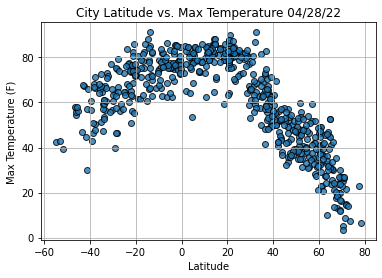

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


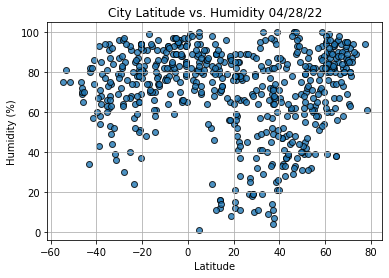

In [31]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


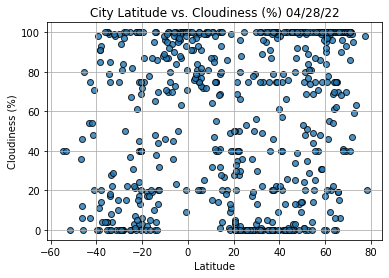

In [33]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

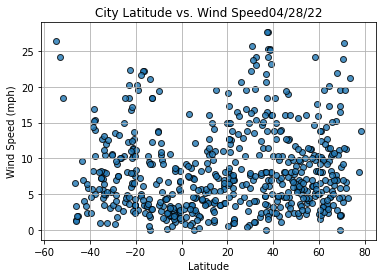

In [34]:
# Build the scatter plot for latitude vs. wind_speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [35]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
index13 = city_data_df.loc[13]
index13

City                    Ekibastuz
Country                        KZ
Date          2022-04-29 00:15:49
Lat                       51.6667
Lng                       75.3667
Max Temp                    59.88
Humidity                       42
Cloudiness                     99
Wind Speed                   9.69
Name: 13, dtype: object

In [38]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4      False
       ...  
589     True
590     True
591     True
592     True
593     True
Name: Lat, Length: 594, dtype: bool

In [39]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-04-29 00:15:43,42.6001,-73.9662,46.81,28,13,1.99
1,Khatanga,RU,2022-04-29 00:15:44,71.9667,102.5000,14.94,94,95,5.82
2,Nouadhibou,MR,2022-04-29 00:15:44,20.9310,-17.0347,64.38,82,2,14.97
3,Talnakh,RU,2022-04-29 00:15:45,69.4865,88.3972,16.21,86,100,2.10
9,Salalah,OM,2022-04-29 00:15:47,17.0151,54.0924,84.29,79,20,3.44


In [40]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

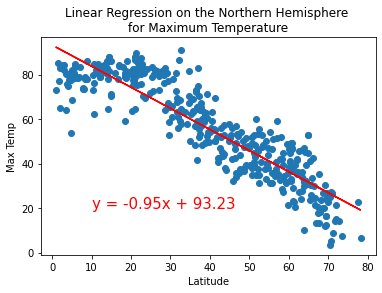

In [71]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 'Max Temp',(10,20))

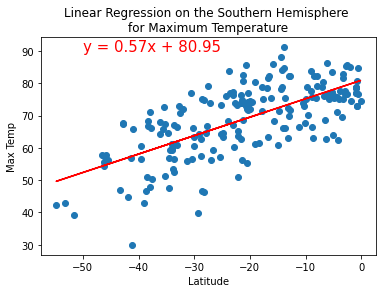

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

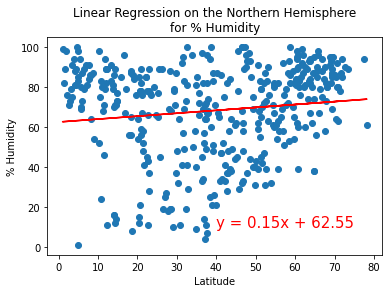

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor % Humidity', 
                       '% Humidity',(40,10))

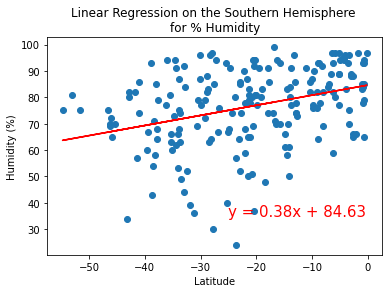

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       'Humidity (%)',(-25,35))

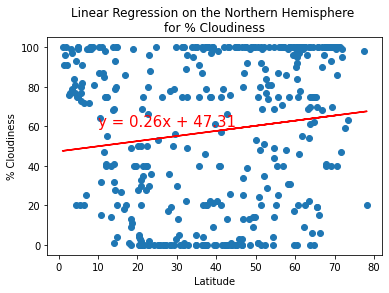

In [83]:
# Linear regression on the Northern Hemisphere for % Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(10,60))

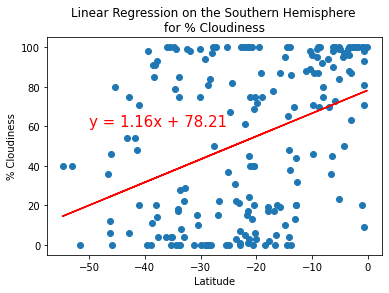

In [82]:
# Linear regression on the Southern Hemisphere for % Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',(-50,60))

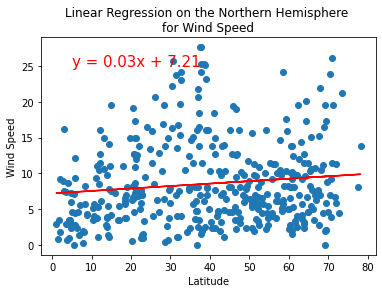

In [89]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',(5,25))

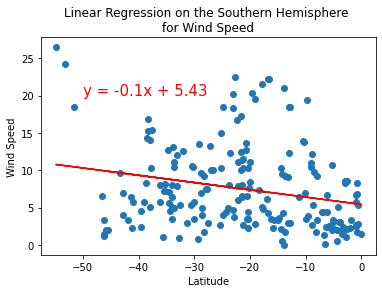

In [92]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed (mp)',(-50,20))